In [0]:
!wget https://www.machinehack.com/wp-content/uploads/2020/01/Food_QUalityA_ParticipantsData.zip

--2020-03-11 19:38:53--  https://www.machinehack.com/wp-content/uploads/2020/01/Food_QUalityA_ParticipantsData.zip
Resolving www.machinehack.com (www.machinehack.com)... 107.180.71.20
Connecting to www.machinehack.com (www.machinehack.com)|107.180.71.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15964857 (15M) [application/zip]
Saving to: ‘Food_QUalityA_ParticipantsData.zip’

Food_QUalityA_Parti 100%[===================>]  15.22M  8.53MB/s    in 1.8s    

2020-03-11 19:38:55 (8.53 MB/s) - ‘Food_QUalityA_ParticipantsData.zip’ saved [15964857/15964857]



In [0]:
!unzip Food_QUalityA_ParticipantsData.zip 

Archive:  Food_QUalityA_ParticipantsData.zip
   creating: Food_QUalityA_ParticipantsData/
  inflating: Food_QUalityA_ParticipantsData/Data_Train.xlsx  
   creating: __MACOSX/
   creating: __MACOSX/Food_QUalityA_ParticipantsData/
  inflating: __MACOSX/Food_QUalityA_ParticipantsData/._Data_Train.xlsx  
  inflating: Food_QUalityA_ParticipantsData/Data_Test.xlsx  
  inflating: __MACOSX/Food_QUalityA_ParticipantsData/._Data_Test.xlsx  
  inflating: Food_QUalityA_ParticipantsData/Sample_Submission.xlsx  
  inflating: __MACOSX/Food_QUalityA_ParticipantsData/._Sample_Submission.xlsx  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_excel('Food_QUalityA_ParticipantsData/Data_Train.xlsx')
test = pd.read_excel('Food_QUalityA_ParticipantsData/Data_Test.xlsx')

In [0]:
train.head(5)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [0]:
train.shape, test.shape

((147443, 15), (49148, 14))

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,147443
Total Missing (%),1.9%
Total size in memory,16.9 MiB
Average record size in memory,120.0 B
Numeric,7
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
train.isnull().sum(), test.isnull().sum()

(ID                        0
 Date                      0
 LicenseNo                 0
 FacilityID                0
 FacilityName              0
 Type                   3485
 Street                    0
 City                      0
 State                     0
 LocationID               35
 Reason                    0
 SectionViolations     39068
 RiskLevel                 0
 Geo_Loc                   0
 Inspection_Results        0
 dtype: int64, ID                       0
 Date                     0
 LicenseNo                0
 FacilityID               0
 FacilityName             0
 Type                  1215
 Street                   0
 City                     0
 State                    0
 LocationID              15
 Reason                   0
 SectionViolations    12976
 RiskLevel                0
 Geo_Loc                  0
 dtype: int64)

In [0]:
train.nunique()

ID                    147443
Date                    2507
LicenseNo              34384
FacilityID             25535
FacilityName           24348
Type                     409
Street                 17290
City                       2
State                      2
LocationID               104
Reason                    17
SectionViolations         61
RiskLevel                  4
Geo_Loc                16316
Inspection_Results         7
dtype: int64

In [0]:
train['year'] = pd.to_datetime(train['Date'], errors='coerce').dt.year
train['month'] = pd.to_datetime(train['Date'], errors='coerce').dt.month
train['date'] = pd.to_datetime(train['Date'], errors='coerce').dt.day
test['year'] = pd.to_datetime(test['Date'], errors='coerce').dt.year
test['month'] = pd.to_datetime(test['Date'], errors='coerce').dt.month
test['date'] = pd.to_datetime(test['Date'], errors='coerce').dt.day

In [0]:
del train['Date']
del test['Date']

In [0]:
"""
loc = np.append(train['City'].values, test['City'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['City']=l.transform(train['City'])
test['City']=l.transform(test['City'])
train['City']=train['City']+1
test['City']=test['City']+1
"""
loc = np.append(train['RiskLevel'].values, test['RiskLevel'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['RiskLevel']=l.transform(train['RiskLevel'])
test['RiskLevel']=l.transform(test['RiskLevel'])

In [0]:
train['Geo_Loc']=train.Geo_Loc.str.extract('(\d+)')
test['Geo_Loc']=test.Geo_Loc.str.extract('(\d+)')
train['City']=train.City.str.extract('(\d+)')
test['City']=test.City.str.extract('(\d+)')
train['State']=train.State.str.extract('(\d+)')
test['State']=test.State.str.extract('(\d+)')

In [0]:
loc = np.append(train['Reason'].values, test['Reason'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Reason']=l.transform(train['Reason'])
test['Reason']=l.transform(test['Reason'])

In [0]:
train = pd.get_dummies(train, columns=['Reason'], drop_first=True)

In [0]:
test= pd.get_dummies(test, columns=['Reason'], drop_first=True)

In [0]:
train['Type'] = train['Type'].fillna('missingType')
test['Type'] = test['Type'].fillna('missingType')

In [0]:
train['LocationID']=train['LocationID'].fillna(method ='bfill')
test['LocationID']=test['LocationID'].fillna(method ='bfill')  

In [0]:
test['SectionViolations'].describe()

count    36172.000000
mean        24.123576
std         12.631510
min          1.000000
25%         14.000000
50%         31.000000
75%         33.000000
max         70.000000
Name: SectionViolations, dtype: float64

In [0]:
train['SectionViolations']=train['SectionViolations'].fillna(train['SectionViolations'].mean())
test['SectionViolations']=test['SectionViolations'].fillna(test['SectionViolations'].mean())  

In [0]:
agg_func = {
    'SectionViolations': ['mean','median','min','max','sum']
    
}
agg_Type = train.groupby('Type').agg(agg_func)
agg_Type.columns = [ 'Type' + ('_'.join(col).strip()) for col in agg_Type.columns.values]
agg_Type.reset_index(inplace=True)
train = train.merge(agg_Type, on=['Type'], how='left')

In [0]:
agg_func = {
    'SectionViolations': ['mean','median','min','max','sum']
    
}
agg_Type = test.groupby('Type').agg(agg_func)
agg_Type.columns = [ 'Type' + ('_'.join(col).strip()) for col in agg_Type.columns.values]
agg_Type.reset_index(inplace=True)
test = test.merge(agg_Type, on=['Type'], how='left')

In [0]:
loc = np.append(train['Type'].values, test['Type'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['Type']=l.transform(train['Type'])
test['Type']=l.transform(test['Type'])
train['Type']=train['Type']+1
test['Type']=test['Type']+1

In [0]:
train['year']=train['year'].fillna(method ='bfill')
test['year']=test['year'].fillna(method ='bfill') 
train['month']=train['month'].fillna(method ='bfill')
test['month']=test['month'].fillna(method ='bfill') 
train['date']=train['date'].fillna(method ='bfill')
test['date']=test['date'].fillna(method ='bfill') 

In [0]:
train_df=train
test_df=test

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Inspection_Results'] = le.fit_transform(train_df['Inspection_Results'])
le.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [0]:
X = train_df.drop(labels=['Inspection_Results'], axis=1)
y = train_df['Inspection_Results'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:

categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score

In [0]:
!pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

     |████████████████████████████████| 64.0MB 67kB/s 
0:	learn: 0.7567235	test: 0.7567235	test1: 0.7571688	best: 0.7571688 (0)	total: 232ms	remaining: 3m 51s
50:	learn: 0.8324863	test: 0.8324863	test1: 0.8342964	best: 0.8342964 (50)	total: 9.06s	remaining: 2m 48s
100:	learn: 0.8442152	test: 0.8442152	test1: 0.8463145	best: 0.8463145 (100)	total: 17.7s	remaining: 2m 37s
150:	learn: 0.8493245	test: 0.8493245	test1: 0.8506009	best: 0.8506009 (150)	total: 26.2s	remaining: 2m 27s
200:	learn: 0.8524353	test: 0.8524353	test1: 0.8527441	best: 0.8527441 (198)	total: 34.8s	remaining: 2m 18s
250:	learn: 0.8551392	test: 0.8551392	test1: 0.8543990	best: 0.8548602 (241)	total: 43.5s	remaining: 2m 9s
300:	learn: 0.8584851	test: 0.8584851	test1: 0.8555655	best: 0.8557825 (298)	total: 52.2s	remaining: 2m 1s
350:	learn: 0.8608725	test: 0.8608725	test1: 0.8570033	best: 0.8570033 (350)	total: 1m	remaining: 1m 52s
400:	learn: 0.8627806	test: 0.8627806	test1: 0.8573018	best: 0.8574374 (370)	total: 1m 9s	re

In [0]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.8600960364613006


In [0]:
import seaborn as sns

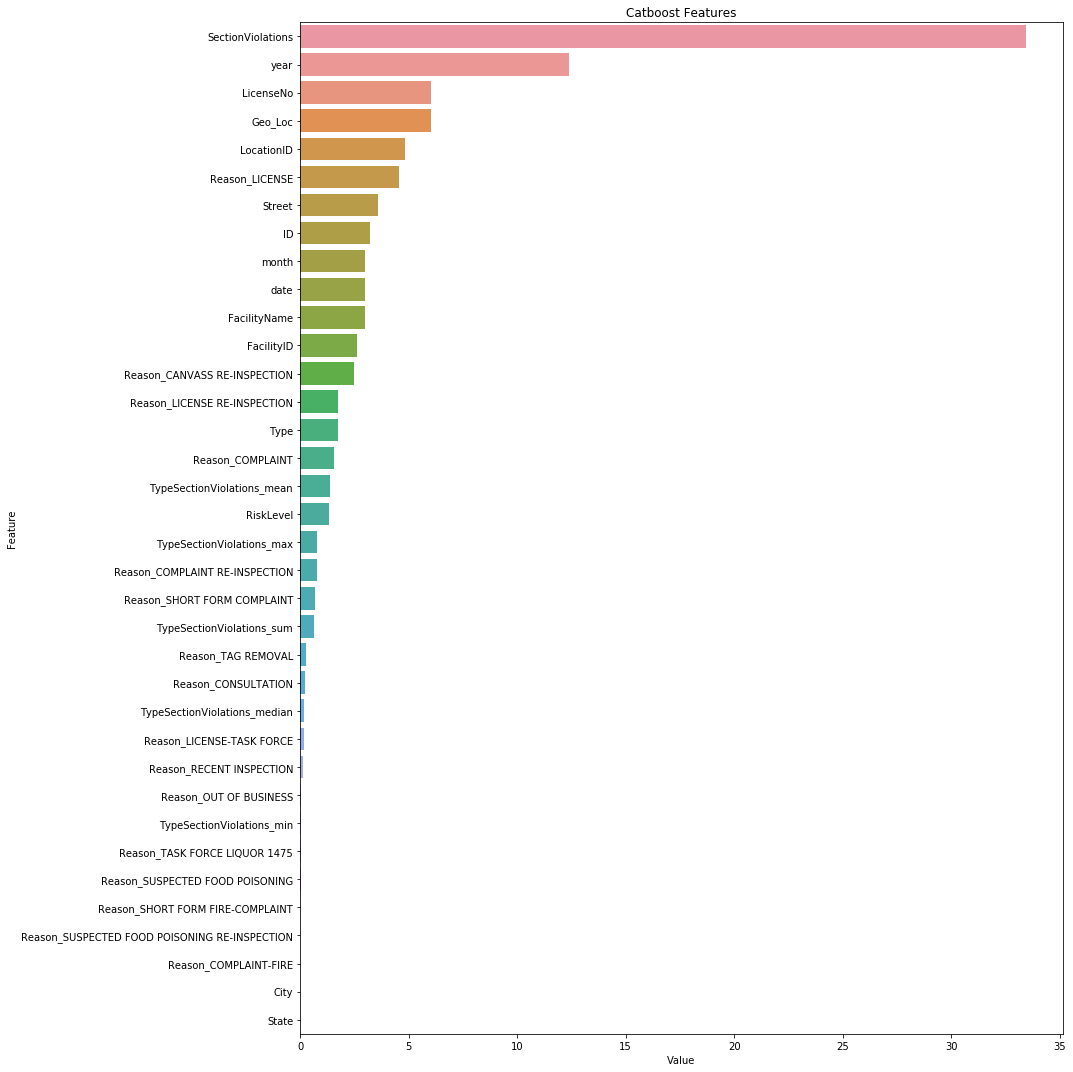

In [0]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test_df

In [0]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.8607324516785351
Accuracy:  0.8615462868769074
Accuracy:  0.8593082400813835
Accuracy:  0.85676500508647
Accuracy:  0.8624618514750763
Accuracy:  0.8591047812817905
Accuracy:  0.8656154628687691
Accuracy:  0.8635808748728383
Accuracy:  0.8625495981279886
Accuracy:  0.8574626106419778
Accuracy:  0.8647878726218333
Accuracy:  0.8652965713704345
Accuracy:  0.8568521721436565
Accuracy:  0.8577678298911384
Accuracy:  0.860413063383864


In [0]:
np.mean(errcat,0)

0.8609496448268442

In [0]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[1],
       [4],
       [5],
       ...,
       [4],
       [5],
       [4]])

In [0]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=y_pred_class, columns=['Delivery_Time'])
df_sub.head()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Delivery_Time
0,1
1,4
2,5
3,4
4,4


In [0]:
!pip install xlsxwriter
writer = pd.ExcelWriter('cat40.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

     |████████████████████████████████| 143kB 2.8MB/s 


In [0]:

df_sub['Delivery_Time'].value_counts()

4    27412
1     7692
5     6868
6     5523
2      834
3      818
0        1
Name: Delivery_Time, dtype: int64

In [0]:
df_sub = pd.get_dummies(df_sub, columns=['Delivery_Time'], drop_first=False)

In [0]:
df_sub

,Delivery_Time_0,Delivery_Time_1,Delivery_Time_2,Delivery_Time_3,Delivery_Time_4,Delivery_Time_5,Delivery_Time_6
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
49143,0,0,0,0,0,0,1
49144,0,0,0,0,1,0,0
49145,0,0,0,0,1,0,0
49146,0,0,0,0,0,1,0


In [0]:
submission = pd.DataFrame({
        "FACILITY CHANGED": df_sub["Delivery_Time_0"],
        "FAIL": df_sub["Delivery_Time_1"],
        "FURTHER INSPECTION REQUIRED": df_sub["Delivery_Time_2"],
        "INSPECTION OVERRULED": df_sub["Delivery_Time_3"],
        "PASS": df_sub["Delivery_Time_4"],
        "PASS(CONDITIONAL)": df_sub["Delivery_Time_5"],
        "SHUT-DOWN":df_sub["Delivery_Time_6"]

        
    })
submission.to_csv('./train.csv', index=False)
print(submission.head(10))

   FACILITY CHANGED  FAIL  ...  PASS(CONDITIONAL)  SHUT-DOWN
0                 0     1  ...                  0          0
1                 0     0  ...                  0          0
2                 0     0  ...                  1          0
3                 0     0  ...                  0          0
4                 0     0  ...                  0          0
5                 0     0  ...                  0          1
6                 0     0  ...                  0          0
7                 0     0  ...                  0          0
8                 0     0  ...                  0          0
9                 0     0  ...                  0          0

[10 rows x 7 columns]


In [0]:
from google.colab import files
files.download('food_quality_final_solution.xlsx')

In [0]:
from google.colab import files
files.upload()

Saving .3568.xls to .3568.xls
Saving .35413.xls to .35413.xls
Saving 0.33.xls to 0.33.xls
Saving 0.36.xls to 0.36.xls
Saving 0.33143.xls to 0.33143.xls


In [0]:
a=pd.read_excel('.3568.xls')
b=pd.read_excel('.35413.xls')
c=pd.read_excel('0.33.xls')
d=pd.read_excel('0.36.xls')
e=pd.read_excel('0.33143.xls')

In [0]:
a.head(5)

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.000006,0.891944,0.000096,0.000524,0.005060,0.102068,0.000301
1,0.000001,0.000799,0.000023,0.000175,0.998044,0.000906,0.000052
2,0.000047,0.005250,0.000258,0.714885,0.030171,0.003000,0.246389
3,0.001097,0.054462,0.000296,0.010118,0.397031,0.002201,0.534795
4,0.000001,0.000887,0.000015,0.000589,0.995593,0.002833,0.000081
